#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170498071/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

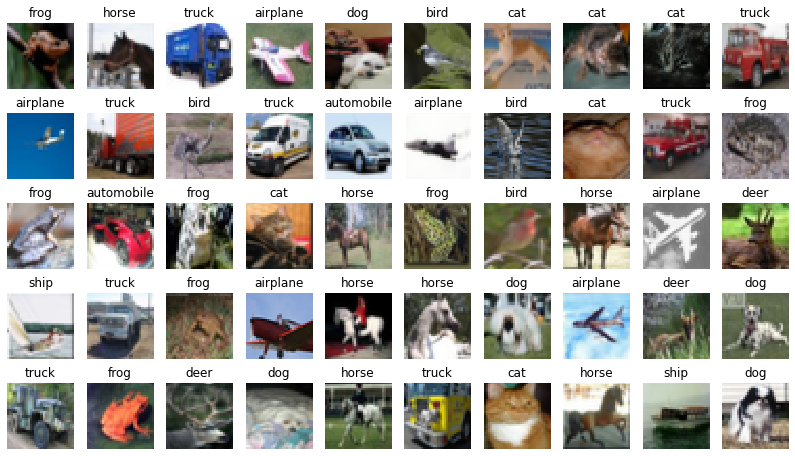

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


m = X_train.mean(axis = 0)
sd = X_train.std(axis = 0)
X_train = (X_train - m) / sd
X_valid = (X_valid - m) / sd
X_test = (X_test - m) / sd

#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 10s 6ms/step - loss: 1.4608 - accuracy: 0.4881 - val_loss: 1.2473 - val_accuracy: 0.5692
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1517 - accuracy: 0.5991 - val_loss: 1.1121 - val_accuracy: 0.6188
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0220 - accuracy: 0.6490 - val_loss: 1.0774 - val_accuracy: 0.6264
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9558 - accuracy: 0.6722 - val_loss: 1.0159 - val_accuracy: 0.6522
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9049 - accuracy: 0.6910 - val_loss: 1.0274 - val_accuracy: 0.6492
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.8617 - accuracy: 0.7039 - val_loss: 1.0148 - val_accuracy: 0.6534
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8220 - accuracy: 0.7206 - val_loss: 1.0175 - val_accuracy: 0.6534
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0323 - accuracy: 0.6584 - 684ms/epoch - 2ms/step
accuracy: 65.84%


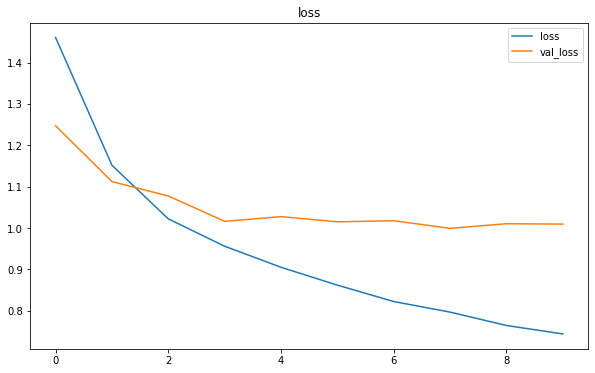

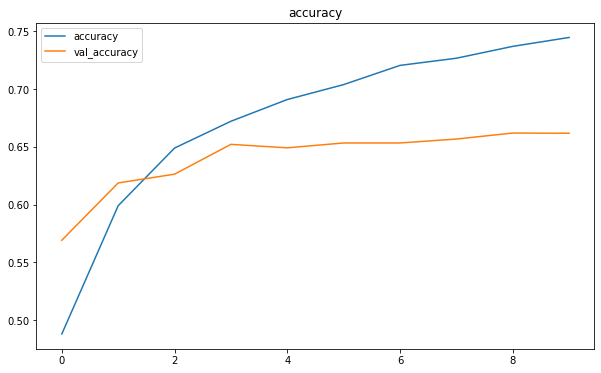

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

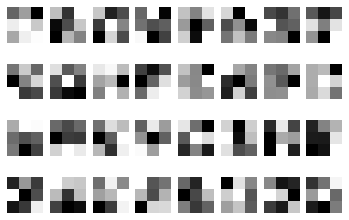

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 32, kernel_size = [3,3], activation = 'relu', input_shape = [32, 32, 3]),
    keras.layers.MaxPool2D(pool_size = [2,2]),
    keras.layers.Conv2D(filters = 16, kernel_size = [2,2], activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:

1. For a Conv2D layer the number of parameter is _filters * (filter neurons * channels + bias)_, so for the first one 32 *(9*3+1) = 896$ parameters and for the second one 16*(4*32+1) = 2064 parameters.
2. The question has a clear obvious answer since the two considered convolutional layers are different almost everywhere: they have a different number of parameters is that they have different kernel size (3x3 for the first layer, 2x2 for the second), a different number of filters and a different depth.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 1.6119 - accuracy: 0.4260 - val_loss: 1.3409 - val_accuracy: 0.5386
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2822 - accuracy: 0.5492 - val_loss: 1.2512 - val_accuracy: 0.5608
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1784 - accuracy: 0.5874 - val_loss: 1.1549 - val_accuracy: 0.5942
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0972 - accuracy: 0.6190 - val_loss: 1.0919 - val_accuracy: 0.6186
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0379 - accuracy: 0.6424 - val_loss: 1.0391 - val_accuracy: 0.6412
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9938 - accuracy: 0.6573 - val_loss: 1.0113 - val_accuracy: 0.6492
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9658 - accuracy: 0.6662 - val_loss: 0.9966 - val_accuracy: 0.6566
Epoch 

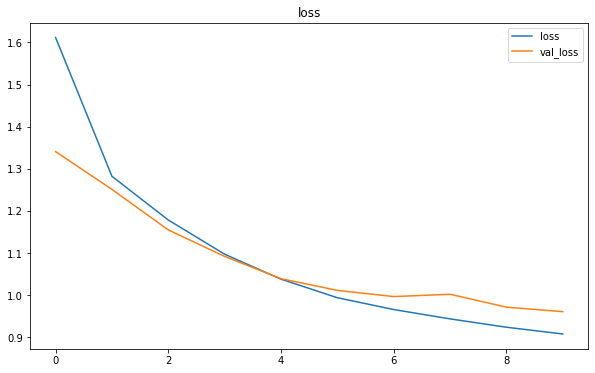

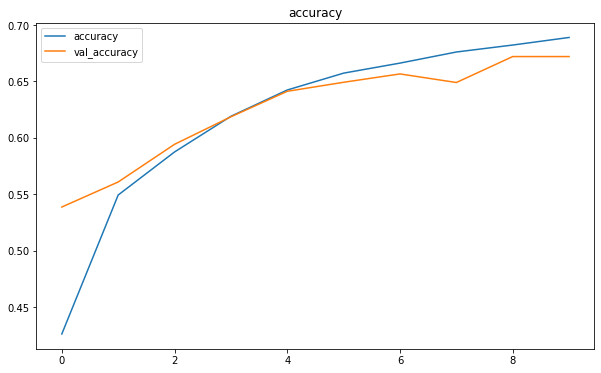

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 128)       147584    
                                                      

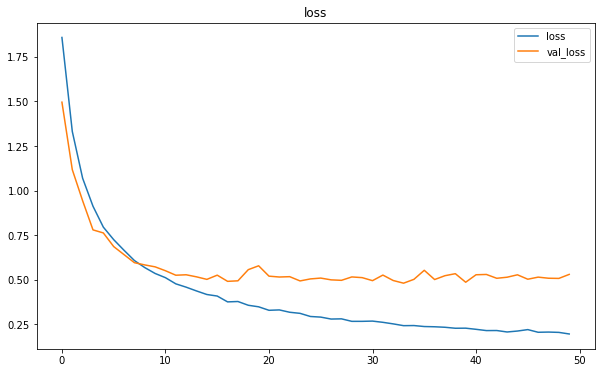

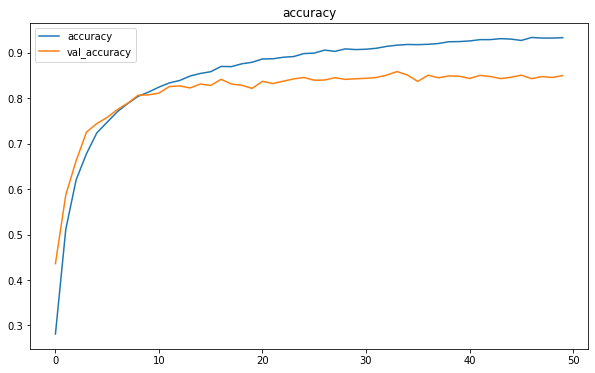

In [ ]:
best_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3],padding="same"),
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu',padding="same"),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu',padding="same"),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation='relu',padding="same"),
    keras.layers.Conv2D(filters=256, kernel_size=[3,3], activation='relu',padding="same"),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),    
    keras.layers.Dense(10, activation="softmax")
  ])
best_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(best_model.summary())

history = best_model.fit(X_train, y_train, epochs=50, batch_size=256,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = best_model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))
print("----------------------------")

### Best Model
The best model that I found has the architecture: 
* Conv2D layer with 64 filters, 3x3 kernel size, ReLU activation
* Conv2D layer with 64 filters, 3x3 kernel size, ReLU activation
* MaxPool2D with 2x2 pool size
* Dropout layer with rate 0.3
* Conv2D layer with 128 filters 3x3, kernel size, ReLU activation
* Conv2D layer with 128 filters 3x3, kernel size, ReLU activation
* MaxPool2D layer with 2x2 pool size
* Dropout layer with rate 0.3
* Conv2D layer with 256 filters, 3x3 kernel size, ReLU activation
Conv2D layer with 256 filters, 3x3 kernel size, ReLU activation
* MaxPool2D layer with 2x2 pool size
* Dropout layer with rate 0.3
* Flatten layer
* Dense layer with 512 neurons, ReLu activation
* Dropout layer with rate 0.3
* Dense layer with 512 neurons, ReLu activation
* Dropout layer with rate 0.3
* Dense layer with 512 neurons, ReLu activation
* Dropout layer with rate 0.3
* Dense layer with 10 neurons, Softmax activation

and the hyperparameters are: 
* Optimizer "adam"
* Epochs 50
* Batch size 256


The achieved accuracy in the test set is 84.29%%

Discussion:
The accuracy on the validation set increased from 67.20% to 85.00%. This was due to the increased complexity of the architecture, which is better able to capture patterns in the data due to the number of filters and the increased number of layers (both convolutional and dense). The increased complexity and increased epochs caused overfitting, so a regularization technique had to be introduced and dropout was seen to be sufficient.


### Other models

* With the following architecture I performed a grid search onto the hyperparameters grid : epoch = [40,60], batch_size = [256, 512], optimizer = ['adam', 'rmsprop'], dropout_prob = [0.3, 0.4]. The architecture was: Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax). The following table is epoch, batch size, optimizer, accuracy on the validation set.
  
  * 40 - 256 - 'adam' - 0.3 - 0.7916
  * 40 - 256 - 'adam' - 0.4 - 0.7620
  * 40 - 256 - 'rmsprop' - 0.3 - 0.7724
  * 40 - 256 - 'rmsprop' - 0.4 - 0.7058
  * 40 - 512 - 'adam' - 0.3 - 0.7802
  * 40 - 512 - 'adam' - 0.4 - 0.7314
  * 40 - 512 - 'rmsprop' - 0.3 - 0.7622
  * 40 - 512 - 'rmsprop' - 0.4 - 0.7080
  * 60 - 256 - 'adam' - 0.3 - 0.8014
  * 60 - 256 - 'adam' - 0.4 - 0.7728
  * 60 - 256 - 'rmsprop' - 0.3 - 0.7960
  * 60 - 256 - 'rmsprop' - 0.4 - 0.7336
  * 60 - 512 - 'adam' - 0.3 - 0.7893
  * 60 - 512 - 'adam' - 0.4 - 0.7644
  * 60 - 512 - 'rmsprop' - 0.3 - 0.7798
  * 60 - 512 - 'rmsprop' - 0.4 - 0.7156

Since the better accuracy is achived with epoch = 60, batch size = 256, optimizer = 'adam', dropout = 0.3, I fixed those hyperparameters and I tryed with different architecture. The results are following (architecture -- accuracy achieved):  

* Conv2D(32, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(16, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.6784
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(32, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.6860
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.6820
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.6840
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.7650
* Conv2D(32, 3x3,'relu')/MaxPool2D(2x2)/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Conv2D(512, 2x2,'relu')/MaxPool2D(2x2)/Flatten/Dense(10,Softmax) -- 0.7340

* Conv2D(32, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(16, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.6924
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(32, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7462
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7650
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7618
* Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.8128
* Conv2D(32, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(512, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.8102

* Conv2D(32, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(16, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7038
* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(32, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7406
* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7644
* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.7578
* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.8178
* Conv2D(32, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(512, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(10,Softmax) -- 0.8016

* Conv2D(32, 3x3,'relu')/Conv2D(32, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(32, 2x2,'relu')/Conv2D(32, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(32, 2x2,'relu')/Conv2D(32, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(64,'relu')/Dropout/Dense(64,'relu')/Dropout/Dense(64,'relu')/Dropout/Dense(10,Softmax) -- 0.7858
* Conv2D(64, 3x3,'relu')/Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu')/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu')/Conv2D(64, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(10,Softmax) -- 0.8484
* Conv2D(64, 3x3,'relu')/Conv2D(64, 3x3,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu')/Conv2D(128, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu')/Conv2D(256, 2x2,'relu')/MaxPool2D(2x2)/Dropout/Flatten/Dense(512,'relu')/Dropout/Dense(512,'relu')/Dropout/Dense(512,'relu')/Dropout/Dense(10,Softmax) -- 0.8494

* Conv2D(64, 3x3,'relu',l2_reg = 1e-4))/Conv2D(64, 3x3,'relu',l2_reg = 1e-4))/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4))/Conv2D(64, 2x2,'relu',l2_reg = 1e-4))/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4))/Conv2D(64, 2x2,'relu',l2_reg = 1e-4))/MaxPool2D(2x2)/Dropout/Flatten/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(10,Softmax) -- 0.8478

* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(512,'relu',l2_reg = 1e-4)/Dropout/Dense(512,'relu')/Dropout/Dense(512,'relu')/Dropout/Dense(10,Softmax) -- 0.8466

* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(256,'relu',l2_reg = 1e-4)/Dropout/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(256,'relu')/Dropout/Dense(10,Softmax) -- 0.8418

* Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(64, 2x2,'relu',l2_reg = 1e-4)/Conv2D(128, 2x2,'relu',l2_reg = 1e-4)/Conv2D(128, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/Conv2D(256, 2x2,'relu',l2_reg = 1e-4)/Conv2D(64, 3x3,'relu',l2_reg = 1e-4)/MaxPool2D(2x2)/Dropout/Flatten/Dense(512,'relu',l2_reg = 1e-4)/Dropout/Dense(512,'relu')/Dropout/Dense(512,'relu')/Dropout/Dense(512,'relu')/Dropout/Dense(10,Softmax) -- 0.8358

We can see that the best architecture is the one of the best model, I decided to tune better the epochs. Here it is following the list of epochs - accuracy:

  * 30 - 0.8402
  * 40 - 0.8456
  * 50 - 0.8474
  * 60 - 0.8454

We found the best epochs is 50 and the accuracy on the validation set is 84.74%. 

Discussion:
I wanted to try different hyperparameters and different architectures, but doing everything together in a single grid search was computationally impossible. So I decided to use a single model with dropout to optimize the number of epochs, batch size and optimizer. With the hyperparameters I found, I tried different types of increasingly complex architectures. In the end it turned out that to capture the nuances of the problem, a fairly complex model with several blocks of convolutional and max pooling layers was needed, followed by a few blocks of dense layers; both regularized by dropout layers to avoid overfitting. I decided to retune some hyperparameters at the very end so i tryed the last architecture with some others hyperparameters. 